In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
Fake = pd.read_csv('Fake.csv')

In [4]:
Fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
Fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [4]:
Fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

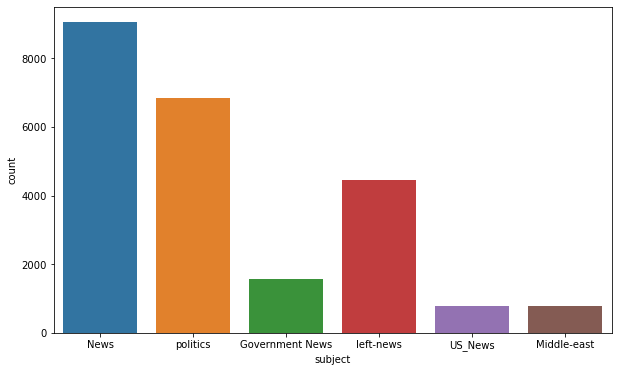

In [5]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'subject',data=Fake)

In [6]:
Real = pd.read_csv('True.csv')

In [7]:
Real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
Real.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

C:\Users\Priyanshu Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='subject', ylabel='count'>

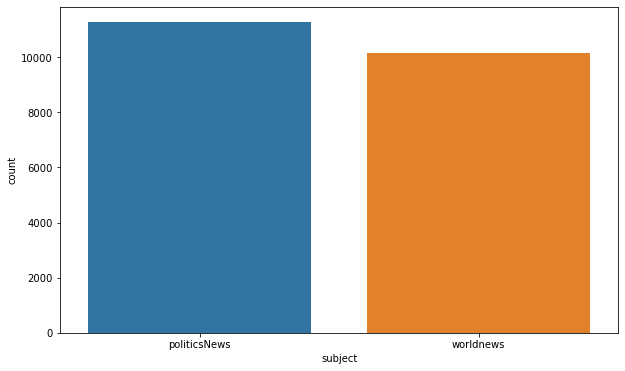

In [9]:
plt.figure(figsize=(10,  6))
sns.countplot('subject',data=Real)

In [10]:
Real.sample(5) 

,title,text,subject,date
20637,EU must be part of U.S. Middle East peace push...,TALLINN (Reuters) - Israelis and Palestinians ...,worldnews,"September 8, 2017"
5596,Two Republican senators seek to slash legal U....,WASHINGTON (Reuters) - Two Republican senators...,politicsNews,"February 7, 2017"
15055,Iran rejects Macron call for talks on Iranian ...,DUBAI (Reuters) - Iran rejected on Sunday a ca...,worldnews,"November 12, 2017"
18060,Syrian army encircles IS in al-Mayadin: Syrian...,BEIRUT (Reuters) - Syria s army and its allies...,worldnews,"October 8, 2017"
9599,Ryan strikes conciliatory tone ahead of Trump ...,WASHINGTON (Reuters) - U.S. House Speaker Paul...,politicsNews,"May 11, 2016"


In [18]:
#WORDCLOUD

In [11]:
text=' '.join(Fake['text'].tolist())

In [12]:
' '.join(['this', 'is', 'a', 'data'])

'this is a data'

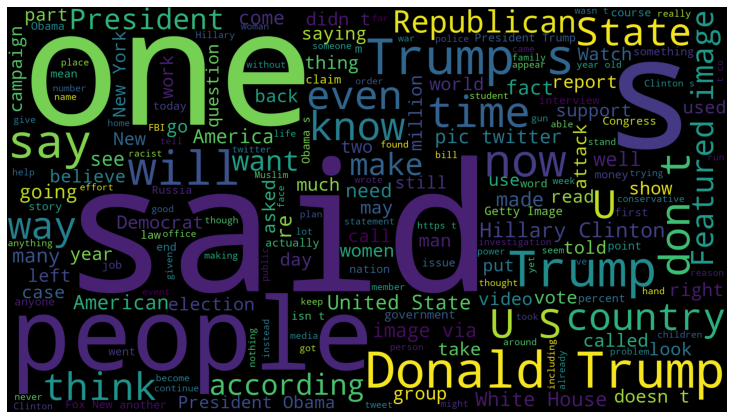

In [21]:
wordcloud = WordCloud(width=1920, height= 1080).generate(text)
fig = plt.figure(figsize= (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad= 0)
plt.show() 

In [13]:
Real.sample(5) 

,title,text,subject,date
17547,Russia regrets Israeli pullout from UNESCO,MOSCOW (Reuters) - Russia regrets Israel s dec...,worldnews,"October 13, 2017"
17890,Turkish police officer shoots prosecutor in An...,ISTANBUL (Reuters) - A Turkish police officer ...,worldnews,"October 10, 2017"
16481,Thailand kicks off sumptuous funeral of King B...,BANGKOK (Reuters) - Thailand on Wednesday mark...,worldnews,"October 25, 2017"
19183,National celebrations open Saudi sports stadiu...,RIYADH (Reuters) - Saudi Arabia is celebrating...,worldnews,"September 23, 2017"
8843,"FBI director says Clinton did not lie, break l...",WASHINGTON (Reuters) - FBI Director James Come...,politicsNews,"July 7, 2016"


In [14]:
unknown_publishers = []
for index,row in enumerate (Real.text.values):
    try:
        record = row.split('-', maxsplit=1)
        record [1]      
        
        assert(len(record[0])<120)
    except:
            unknown_publishers.append(index)

In [15]:
len(unknown_publishers)

222

In [16]:
Real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [17]:
Real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [18]:
Real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [19]:
Real = Real.drop(8970, axis=0)

In [20]:
publisher = []
tmp_text = []
for index, row in enumerate(Real.text.values):
    if index in unknown_publishers:
        tmp_text.append(row)
        publisher.append('Unknown')
        
    else:
            record = row.split('-', maxsplit=1)
            publisher.append(record[0].strip())
            tmp_text.append(record[1].strip())

In [32]:
Real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [33]:
Real.shape

(21416, 5)

In [22]:
empty_fake_index = [index for index,text in enumerate (Fake.text.tolist()) if str(text).strip()==""]

In [23]:
Fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [24]:
Real['text'] + " " + Real['text']
Fake['text'] = Fake['title'] +  " " + Fake ['text']

In [25]:
Real['text'] = Real['text'].apply(lambda x: str(x).lower())
Fake['text'] = Fake['text'].apply(lambda x: str(x).lower())
#converting of Capital letters into small letters

In [38]:
#PREPROCESSING TEXT

In [26]:
Real['class']= 1
Fake['class']= 0

In [27]:
Real = Real[['text', 'class']]

In [28]:
Fake = Fake[['text', 'class']]

In [29]:
data = Real.append(Fake, ignore_index=True)

,text,class
3023,u.s. president donald trump praised the suprem...,1
43026,parent furious after 4th grade class joins hat...,0
17032,iran s military chief met with syrian presiden...,1
12097,south korea s foreign minister will visit japa...,1
7424,the future leader of the middle east’s top for...,1


In [44]:
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstal

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-05-06 06:59:27.794028: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-05-06 06:59:27.794090: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\priyanshu singh\appdata\local\temp\pip-req-build-rd07pdyu
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7692 sha256=28eadaa8795c0ceb66c9a61ec9cca88c43ebd91d7951bd0d45470e537ae92310
  Stored in directory: C:\Users\Priyanshu Singh\AppData\Local\Temp\pip-ephem-wheel-cache-2givbrks\wheels\d1\c3\bb\559fe93e652b51cbc532f17e9693f3b70055f8560cf06c1fb3
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\Priyanshu Singh\AppData\Local\Temp\pip-req-build-rd07pdyu'


In [31]:
import preprocess_kgptalkie as ps

In [32]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [33]:
ps.remove_special_chars('this ,.@ # is gre@t')

'this is gret'

In [48]:
#Vectorizaltion --Word2vec 

In [49]:
data.head()

,text,class
0,the head of a conservative republican faction ...,1
1,transgender people will be allowed for the fir...,1
2,the special counsel investigation of links bet...,1
3,trump campaign adviser george papadopoulos tol...,1
4,president donald trump called on the us postal...,1


In [34]:
import gensim

In [35]:
y = data['class'].values

In [36]:
x =[d.split()for d in data['text'].tolist()]

In [53]:
type(x[0])

list

In [54]:
print(x[0])

['the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues', 'such', 'as', 'immigration', 'policy', 'even', 'as', 'the', 'november', 'congressional', 'e

In [ ]:
DIM = 100.0
w2v_model = gensim.models.Word2Vec(sentences =x ,vector_size = DIM , window = 5, min_count= 1)

Exception in thread Thread-29:
Traceback (most recent call last):
  File "C:\Users\Priyanshu Singh\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
Exception in thread Thread-28:
Traceback (most recent call last):
  File "C:\Users\Priyanshu Singh\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
Exception in thread Thread-30:
Traceback (most recent call last):
  File "C:\Users\Priyanshu Singh\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Priyanshu Singh\anaconda3\lib\threading.py", line 910, in run
    self.run()
  File "C:\Users\Priyanshu Singh\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Priyanshu Singh\anaconda3\lib\site-packages\gensim\models\word2vec.py", line 1162, in _worker_loop
    tally, raw_tally = self._do_train_job(data_iterable, alpha, thread_private_mem)
  File "C:\Users\Priyanshu Singh\anaconda3\lib\site-packages\gensim\models\word2vec.py", lin

In [ ]:
w2v_model.wv['love']


In [ ]:
w2v_model.wv.most_similar('india')


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [ ]:
x = tokenizer.texts_to_sequences(x)

In [ ]:
maxlen = 1000
x = pad_sequences(x, maxlen=maxlen)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
    weight_matrix = np.zeros(vocab_size, float(DIM))
    
    for word,i in vocab.items():
        weight_matrix[i] = model.wv[word]
        
        return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim = DIM, weights = [embedding_vectors], input_length= maxlen, trainable= False))
model.add(lSTM(units=128))
model.add(Dense(, activation='sigmoid'))
model.compile(optimizer='adam', 'loss=binary_crossentropy' , metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
x_train, x_test, y_test = train_test_split(xx,y)

In [ ]:
model.fit(x_train, y_train, validation_split=0.3, epochs = 6)